In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    def predict(self, X, radius=0.4):   
        pred = []
        
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        for t in range(len(X)):
            prob_of_classes = []
            for i in range(self.no_of_classes):
                prior_prob = members_of_class[i]/len(self.y_train)
                inRadius_no = 0
                inRadius_no_current_class = 0

                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                margin_prob = inRadius_no/len(self.X_train)
                likelihood = inRadius_no_current_class/len(self.X_train)
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            pred.append(np.argmax(prob_of_classes))
                
        return pred

In [9]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    def predict(self, X, radius=0.4):   
        pred = []
        
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        for t in range(len(X)):
            prob_of_classes = []
            for i in range(self.no_of_classes):
                prior_prob = members_of_class[i]/len(self.y_train)
                inRadius_no = 0
                inRadius_no_current_class = 0

                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                margin_prob = inRadius_no/len(self.X_train)
                likelihood = inRadius_no_current_class/len(self.X_train)
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            pred.append(np.argmax(prob_of_classes))
                
        return pred

In [10]:
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

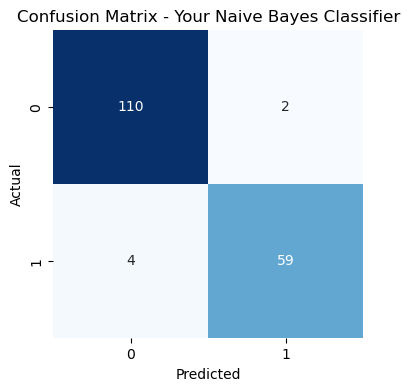

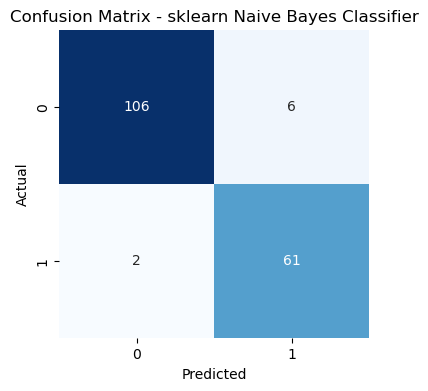

Classification Report for my Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.97      0.94      0.95        63

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Classification Report for sklearn Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.91      0.97      0.94        63

    accuracy                           0.95       175
   macro avg       0.95      0.96      0.95       175
weighted avg       0.96      0.95      0.95       175



AttributeError: 'NaiveBayesClassifier' object has no attribute 'predict_proba'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_precision_recall_curve(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.show()

def breastCancerTest():
    # Importing the dataset
    dataset = pd.read_csv('breastCancer.csv')
    dataset.replace('?', 0, inplace=True)
    dataset = dataset.applymap(np.int64)
    X = dataset.iloc[:, 1:-1].values    
    y = dataset.iloc[:, -1].values

    # This part is necessary because of the NUMBER of features part of algo
    # and in this dataset classes are marked with 2 and 4
    y_new = []
    for i in range(len(y)):
        if y[i] == 2:
            y_new.append(0)
        else:
            y_new.append(1)
    y_new = np.array(y_new)

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=0)

    # Testing my Naive Bayes Classifier
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test, radius=8)

    # sklearn
    NB_sk = GaussianNB()
    NB_sk.fit(X_train, y_train)
    sk_pred = NB_sk.predict(X_test)

    # Visualization
    plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - Your Naive Bayes Classifier')
    plot_confusion_matrix(y_test, sk_pred, 'Confusion Matrix - sklearn Naive Bayes Classifier')

    print("Classification Report for my Naive Bayes Classifier:\n", classification_report(y_test, y_pred))
    print("Classification Report for sklearn Naive Bayes Classifier:\n", classification_report(y_test, sk_pred))

    # ROC Curve
    y_scores = NB.predict_proba(X_test, radius=8)[:, 1]
    plot_roc_curve(y_test, y_scores, 'ROC Curve - Your Naive Bayes Classifier')

    y_scores_sk = NB_sk.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_scores_sk, 'ROC Curve - sklearn Naive Bayes Classifier')

    # Precision-Recall Curve
    plot_precision_recall_curve(y_test, y_scores, 'Precision-Recall Curve - Your Naive Bayes Classifier')
    plot_precision_recall_curve(y_test, y_scores_sk, 'Precision-Recall Curve - sklearn Naive Bayes Classifier')

    print("Accuracy for my Naive Bayes Classifier: ", accuracy(y_test, y_pred), "%")
    print("Accuracy for sklearn Naive Bayes Classifier: ", accuracy(y_test, sk_pred), "%")

# Call the function to execute the test and visualization
breastCancerTest()
